In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np

# imports
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import pathlib
import os
import numpy as np
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time


Cannot find header.dxf (GDAL_DATA is not defined)


In [2]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm

from shapely.geometry import box

In [3]:
# opening STAC catalog, either a url, cloud storage link or a local (cloned) folder
cwd = pathlib.Path().resolve()

catalog = pystac_client.Client.open(
    "https://storage.googleapis.com/dgds-data-public/gca/SOTC/gca-stac_sotc/catalog.json" # cloud API
    #os.path.join(os.path.dirname(cwd), "stac_folder", "current", "catalog.json") # local clone 
)
catalog

<Client id=gca-catalog>

In [4]:
list(catalog.get_children())

[<CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=world_pop>,
 <CollectionClient id=world_gdp>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_drivers>,
 <CollectionClient id=esl_gwl>,
 <CollectionClient id=sub_threat>,
 <CollectionClient id=Exp_world_pop>,
 <CollectionClient id=Exp_world_pop_parquet>,
 <CollectionClient id=Haz-ESL>,
 <CollectionClient id=Vul-Inf_Mort>,
 <CollectionClient id=Haz-GCM_90-100>,
 <CollectionClient id=Exp-NS_Slopes>,
 <CollectionClient id=Vul_MYS>,
 <CollectionClient id=Vul_RS>,
 <CollectionClient id=Haz-GCM_40-50>,
 <CollectionClient id=Haz-ERA5_04-14>,
 <CollectionClient id=Vul-GDP_Cap>,
 <CollectionClient id=Haz-GCM_04-14>,
 <CollectionClient id=Haz-Land_Sub_2010_COGs>,
 <CollectionClient id=Haz-Land_Sub_2040_COGs>,
 <CollectionClient id=Vul-Roads_Density_COGs>,
 <CollectionClient id=Exp-Delta_DEM_COGs>]

In [5]:
collection= catalog.get_child("Exp-NS_Slopes")
collection

<CollectionClient id=Exp-NS_Slopes>

In [6]:
href = catalog.get_child("Exp-NS_Slopes").assets["data"].href
ds = xr.open_zarr(href)
ds

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:     (nstations: 783438)
Coordinates:
    error_code  (nstations) int64 dask.array<chunksize=(48965,), meta=np.ndarray>
    lat         (nstations) float64 dask.array<chunksize=(48965,), meta=np.ndarray>
    lon         (nstations) float64 dask.array<chunksize=(48965,), meta=np.ndarray>
Dimensions without coordinates: nstations
Data variables:
    dc          (nstations) float64 dask.array<chunksize=(48965,), meta=np.ndarray>
    slope       (nstations) float64 dask.array<chunksize=(48965,), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Panagiotis Athanasiou, Ap van Dongeren, Alessio Giar...
    CITATION:            Athanasiou, P., van Dongeren, A., Giardino, A., Vous...
    COMMENT:             Error or Warning code from the calculation: 0: No er...
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         Global nearshore slope estimations using an interpol...
    ...                  ...
    SPATIAL_EXTENT:      [-180, -90, 180, 90]
    TAGS:                ['nearshore slope', 'global distribution', 'MERIT+GE...
    TEMPORAL_EXTENT:     ['2019-04-30T00:00:00Z', 'Present']
    TITLE:               Global Distribution of Nearshore Slopes
    TITLE_ABBREVIATION:  gsns
    UNITS:               Decimal degrees for Latitude and Longitude, Positive...

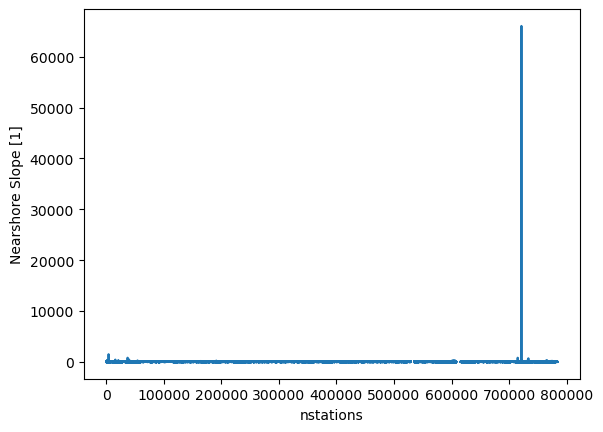

In [7]:


# Create a map projection
ax = plt.axes()

# Plot the variable
ds["slope"].plot(ax=ax)


# Set the title
# plt.title('Wave Height')

# Show the plot
plt.show()

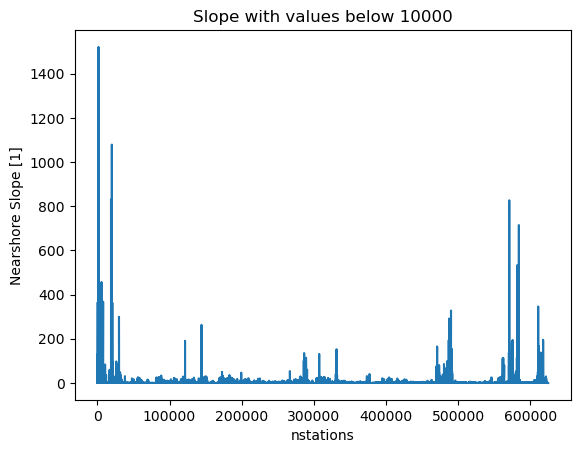

In [8]:
ds=ds.compute()

# Find the maximum value of ds["slope"]
max_slope =10000

# Drop the maximum value of ds["slope"]
ds_without_max = ds["slope"][ds["slope"] < max_slope]

# Create a map projection
ax = plt.axes()

# Plot the variable without the maximum value
ds_without_max.plot(ax=ax)

# Set the title
plt.title(f'Slope with values below {max_slope}')

# Show the plot
plt.show()


In [9]:
df=ds.to_dataframe()
df.head()

dc  error_code      lat      lon     slope
nstations                                                   
0          20.485961           6 -58.4052 -26.3728  0.011182
1          20.485961           6 -58.4079 -26.3890  0.011312
2          20.485961           6 -58.4098 -26.4057  0.010914
3          20.485961           6 -58.4112 -26.4227  0.010500
4          20.485961           0 -58.4123 -26.4396  3.269054

In [10]:

data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)
data_points

dc  error_code      lat      lon     slope  \
nstations                                                      
0          20.485961           6 -58.4052 -26.3728  0.011182   
1          20.485961           6 -58.4079 -26.3890  0.011312   
2          20.485961           6 -58.4098 -26.4057  0.010914   
3          20.485961           6 -58.4112 -26.4227  0.010500   
4          20.485961           0 -58.4123 -26.4396  3.269054   
...              ...         ...      ...      ...       ...   
783433      8.504953           4  67.6111  48.1141       NaN   
783434      8.504953           2  67.6145  48.1203  0.001116   
783435      8.508141           2  67.5380  47.8598  0.001609   
783436      8.509773           4  67.5357  47.8671       NaN   
783437     11.538615           4  68.9447  53.9009       NaN   

                              geometry  
nstations                               
0          POINT (-26.37280 -58.40520)  
1          POINT (-26.38900 -58.40790)  
2          POINT (-26.40570 -58.40980)  
3          POINT (-26.42270 -58.41120)  
4          POINT (-26.43960 -58.41230)  
...                                ...  
783433       POINT (48.11410 67.61110)  
783434       POINT (48.12030 67.61450)  
783435       POINT (47.85980 67.53800)  
783436       POINT (47.86710 67.53570)  
783437       POINT (53.90090 68.94470)  

[783438 rows x 6 columns]

In [11]:
template_df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Arjen_Vector_Template.csv")
template_df.head()

transect_id country_id      continent country_name  Start_lon  Start_lat  \
0  BOX_028_183_0        CHL  South America        Chile -74.386310 -50.377659   
1  BOX_028_183_1        CHL  South America        Chile -74.382469 -50.379144   
2  BOX_028_183_2        CHL  South America        Chile -74.378628 -50.380629   
3  BOX_028_183_3        CHL  South America        Chile -74.373950 -50.382583   
4  BOX_028_183_4        CHL  South America        Chile -74.370425 -50.384358   

   Intersect_lon  Intersect_lat    End_lon    End_lat  
0     -74.390966     -50.382558 -74.395623 -50.387456  
1     -74.387125     -50.384042 -74.391782 -50.388940  
2     -74.383284     -50.385527 -74.387941 -50.390425  
3     -74.379517     -50.387079 -74.385083 -50.391574  
4     -74.375991     -50.388853 -74.381558 -50.393348

In [12]:

circle_center_all = gpd.GeoDataFrame(
    template_df, geometry=gpd.points_from_xy(template_df.Intersect_lon, template_df.Intersect_lat), crs="EPSG:4326"
)
circle_center_all.head()

transect_id country_id      continent country_name  Start_lon  Start_lat  \
0  BOX_028_183_0        CHL  South America        Chile -74.386310 -50.377659   
1  BOX_028_183_1        CHL  South America        Chile -74.382469 -50.379144   
2  BOX_028_183_2        CHL  South America        Chile -74.378628 -50.380629   
3  BOX_028_183_3        CHL  South America        Chile -74.373950 -50.382583   
4  BOX_028_183_4        CHL  South America        Chile -74.370425 -50.384358   

   Intersect_lon  Intersect_lat    End_lon    End_lat  \
0     -74.390966     -50.382558 -74.395623 -50.387456   
1     -74.387125     -50.384042 -74.391782 -50.388940   
2     -74.383284     -50.385527 -74.387941 -50.390425   
3     -74.379517     -50.387079 -74.385083 -50.391574   
4     -74.375991     -50.388853 -74.381558 -50.393348   

                      geometry  
0  POINT (-74.39097 -50.38256)  
1  POINT (-74.38713 -50.38404)  
2  POINT (-74.38328 -50.38553)  
3  POINT (-74.37952 -50.38708)  
4  POINT (-74.37599 -50.38885)

In [13]:
IPCC=gpd.read_file(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\IPCC-WGI-reference-regions-v4.gpkg")
IPCC.head()

Continent  Type               Name Acronym  \
0          POLAR  Land  Greenland/Iceland     GIC   
1  NORTH-AMERICA  Land  N.W.North-America     NWN   
2  NORTH-AMERICA  Land  N.E.North-America     NEN   
3  NORTH-AMERICA  Land    W.North-America     WNA   
4  NORTH-AMERICA  Land    C.North-America     CNA   

                                            geometry  
0  MULTIPOLYGON (((-10.00000 62.00000, -10.43750 ...  
1  MULTIPOLYGON (((-105.00000 50.00000, -105.4386...  
2  MULTIPOLYGON (((-50.00000 50.00000, -50.44000 ...  
3  MULTIPOLYGON (((-130.00000 50.00000, -129.5614...  
4  MULTIPOLYGON (((-90.00000 50.00000, -90.00000 ...

In [14]:
region_acronym= "CAR"
region_gdf=IPCC.loc[IPCC["Acronym"]==region_acronym,:]
region_gdf


Continent        Type       Name Acronym  \
8  CENTRAL-AMERICA  Land-Ocean  Caribbean     CAR   

                                            geometry  
8  MULTIPOLYGON (((-75.00000 12.00000, -75.32609 ...

In [15]:

# circle_center=region_gdf.sjoin(circle_center_all)
circle_center=circle_center_all.sjoin(region_gdf)
circle_center=circle_center.iloc[:,0:11]
circle_center.index=range(0,len(circle_center.index))
circle_center

transect_id country_id      continent        country_name  \
0       BOX_116_353_2        COL  South America            Colombia   
1       BOX_116_353_3        COL  South America            Colombia   
2       BOX_116_353_4        COL  South America            Colombia   
3       BOX_116_353_5        COL  South America            Colombia   
4       BOX_116_353_6        COL  South America            Colombia   
...               ...        ...            ...                 ...   
37504  BOX_139_002_61        DOM  North America  Dominican Republic   
37505  BOX_139_002_62        DOM  North America  Dominican Republic   
37506  BOX_139_002_63        DOM  North America  Dominican Republic   
37507  BOX_139_002_64        DOM  North America  Dominican Republic   
37508  BOX_139_002_65        DOM  North America  Dominican Republic   

       Start_lon  Start_lat  Intersect_lon  Intersect_lat    End_lon  \
0     -71.874132  12.257491     -71.879805      12.250684 -71.885477   
1     -71.869660  12.252394     -71.876981      12.247308 -71.884303   
2     -71.866684  12.243923     -71.875632      12.243144 -71.884580   
3     -71.866286  12.239551     -71.875233      12.238772 -71.884181   
4     -71.865960  12.235759     -71.874835      12.234400 -71.883710   
...          ...        ...            ...            ...        ...   
37504 -71.660191  17.969154     -71.668186      17.965259 -71.676182   
37505 -71.657870  17.964549     -71.666228      17.961418 -71.674587   
37506 -71.656224  17.960573     -71.664583      17.957442 -71.672941   
37507 -71.654578  17.956598     -71.662937      17.953466 -71.671295   
37508 -71.652933  17.952622     -71.661291      17.949491 -71.669649   

         End_lat                    geometry  
0      12.243877  POINT (-71.87980 12.25068)  
1      12.242222  POINT (-71.87698 12.24731)  
2      12.242366  POINT (-71.87563 12.24314)  
3      12.237993  POINT (-71.87523 12.23877)  
4      12.233041  POINT (-71.87483 12.23440)  
...          ...                         ...  
37504  17.961363  POINT (-71.66819 17.96526)  
37505  17.958286  POINT (-71.66623 17.96142)  
37506  17.954311  POINT (-71.66458 17.95744)  
37507  17.950335  POINT (-71.66294 17.95347)  
37508  17.946359  POINT (-71.66129 17.94949)  

[37509 rows x 11 columns]

In [16]:
template_df=circle_center.iloc[:,0:10]
template_df.index=range(0,len(template_df.index))
template_df

transect_id country_id      continent        country_name  \
0       BOX_116_353_2        COL  South America            Colombia   
1       BOX_116_353_3        COL  South America            Colombia   
2       BOX_116_353_4        COL  South America            Colombia   
3       BOX_116_353_5        COL  South America            Colombia   
4       BOX_116_353_6        COL  South America            Colombia   
...               ...        ...            ...                 ...   
37504  BOX_139_002_61        DOM  North America  Dominican Republic   
37505  BOX_139_002_62        DOM  North America  Dominican Republic   
37506  BOX_139_002_63        DOM  North America  Dominican Republic   
37507  BOX_139_002_64        DOM  North America  Dominican Republic   
37508  BOX_139_002_65        DOM  North America  Dominican Republic   

       Start_lon  Start_lat  Intersect_lon  Intersect_lat    End_lon  \
0     -71.874132  12.257491     -71.879805      12.250684 -71.885477   
1     -71.869660  12.252394     -71.876981      12.247308 -71.884303   
2     -71.866684  12.243923     -71.875632      12.243144 -71.884580   
3     -71.866286  12.239551     -71.875233      12.238772 -71.884181   
4     -71.865960  12.235759     -71.874835      12.234400 -71.883710   
...          ...        ...            ...            ...        ...   
37504 -71.660191  17.969154     -71.668186      17.965259 -71.676182   
37505 -71.657870  17.964549     -71.666228      17.961418 -71.674587   
37506 -71.656224  17.960573     -71.664583      17.957442 -71.672941   
37507 -71.654578  17.956598     -71.662937      17.953466 -71.671295   
37508 -71.652933  17.952622     -71.661291      17.949491 -71.669649   

         End_lat  
0      12.243877  
1      12.242222  
2      12.242366  
3      12.237993  
4      12.233041  
...          ...  
37504  17.961363  
37505  17.958286  
37506  17.954311  
37507  17.950335  
37508  17.946359  

[37509 rows x 10 columns]

In [17]:

buffer_circles_gdf = gpd.read_file("Caribbean_buffer_circles_1km.gpkg")
buffer_circles_gdf


geometry
0      POLYGON ((-71.87062 12.25078, -71.87066 12.249...
1      POLYGON ((-71.86780 12.24740, -71.86783 12.246...
2      POLYGON ((-71.86645 12.24324, -71.86648 12.242...
3      POLYGON ((-71.86605 12.23887, -71.86609 12.237...
4      POLYGON ((-71.86565 12.23450, -71.86569 12.233...
...                                                  ...
37504  POLYGON ((-71.65875 17.96539, -71.65878 17.964...
37505  POLYGON ((-71.65679 17.96155, -71.65683 17.960...
37506  POLYGON ((-71.65515 17.95757, -71.65518 17.956...
37507  POLYGON ((-71.65350 17.95360, -71.65354 17.952...
37508  POLYGON ((-71.65186 17.94962, -71.65189 17.948...

[37509 rows x 1 columns]

In [18]:

buffer_circles = buffer_circles_gdf
buffer_circles



geometry
0      POLYGON ((-71.87062 12.25078, -71.87066 12.249...
1      POLYGON ((-71.86780 12.24740, -71.86783 12.246...
2      POLYGON ((-71.86645 12.24324, -71.86648 12.242...
3      POLYGON ((-71.86605 12.23887, -71.86609 12.237...
4      POLYGON ((-71.86565 12.23450, -71.86569 12.233...
...                                                  ...
37504  POLYGON ((-71.65875 17.96539, -71.65878 17.964...
37505  POLYGON ((-71.65679 17.96155, -71.65683 17.960...
37506  POLYGON ((-71.65515 17.95757, -71.65518 17.956...
37507  POLYGON ((-71.65350 17.95360, -71.65354 17.952...
37508  POLYGON ((-71.65186 17.94962, -71.65189 17.948...

[37509 rows x 1 columns]

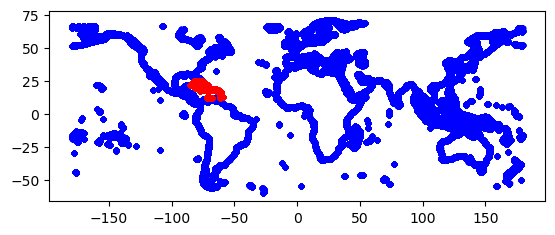

In [19]:





# Step 2: Visualize these 2 geospatial datasets on a map
fig, ax = plt.subplots()
data_points.plot(ax=ax, color='blue', markersize=10)
circle_center.plot(ax=ax, color='red', markersize=10)
buffer_circles.boundary.plot(ax=ax, color='red')
plt.show()


In [20]:
# fig, ax = plt.subplots()
# data_points.plot(ax=ax, color='blue', markersize=10)
# circle_center.plot(ax=ax, color='red', markersize=10)
# buffer_circles.boundary.plot(ax=ax, color='red')

# # Set the axis limits to the extent of circle_center
# xmin, ymin, xmax, ymax = circle_center.total_bounds

# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)

# plt.show()


In [21]:
# search_radius=check_distance
# lon_x=-69.07256	
# lat_y=12.18975


# fig, ax = plt.subplots()
# data_points.plot(ax=ax, color='blue', markersize=10)
# circle_center.plot(ax=ax, color='red', markersize=10)
# buffer_circles.boundary.plot(ax=ax, color='red')

# # Set the axis limits to the extent of circle_center
# # xmin, ymin, xmax, ymax = circle_center.total_bounds
# xmin,xmax=lon_x-search_radius,lon_x+search_radius
# ymin,ymax=lat_y-search_radius,lat_y+search_radius
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)

# plt.show()


In [23]:
# search_radius=check_distance
lon_x=-69.07256	
lat_y=12.18975

# Create a bounding box geometry from the extent of buffer circles
xmin, ymin, xmax, ymax = circle_center.total_bounds
bbox = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])
bbox = gpd.GeoDataFrame(geometry=[bbox], crs="EPSG:4326")

# Spatially join data_points with the bounding box to select only the points within the extent of buffer circles
data_points_within_extent = gpd.sjoin(data_points, bbox, op='within')



c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\IPython\core\interactiveshell.py:3488: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [24]:

# fig, ax = plt.subplots()
# ax = plt.axes(projection=ccrs.PlateCarree())

# data_points_within_extent.plot(ax=ax, color='blue', markersize=10)
# circle_center.plot(ax=ax, color='red', markersize=10)
# buffer_circles.boundary.plot(ax=ax, color='red')


# # Add features like coastlines, borders, and ocean
# ax.coastlines()
# ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='black')
# ax.add_feature(cartopy.feature.OCEAN)

# # Set the axis limits to the extent of circle_center
# # xmin, ymin, xmax, ymax = circle_center.total_bounds
# xmin,xmax=lon_x-search_radius,lon_x+search_radius
# ymin,ymax=lat_y-search_radius,lat_y+search_radius
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)

# plt.show()


In [26]:
buffer_circles

geometry
0      POLYGON ((-71.87062 12.25078, -71.87066 12.249...
1      POLYGON ((-71.86780 12.24740, -71.86783 12.246...
2      POLYGON ((-71.86645 12.24324, -71.86648 12.242...
3      POLYGON ((-71.86605 12.23887, -71.86609 12.237...
4      POLYGON ((-71.86565 12.23450, -71.86569 12.233...
...                                                  ...
37504  POLYGON ((-71.65875 17.96539, -71.65878 17.964...
37505  POLYGON ((-71.65679 17.96155, -71.65683 17.960...
37506  POLYGON ((-71.65515 17.95757, -71.65518 17.956...
37507  POLYGON ((-71.65350 17.95360, -71.65354 17.952...
37508  POLYGON ((-71.65186 17.94962, -71.65189 17.948...

[37509 rows x 1 columns]

In [27]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points_within_extent[data_points_within_extent.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
            circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,'slope']=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,'slope']=nearest_point["slope"].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 37509/37509 [31:58<00:00, 19.55it/s]


transect_id country_id      continent        country_name  \
0       BOX_116_353_2        COL  South America            Colombia   
1       BOX_116_353_3        COL  South America            Colombia   
2       BOX_116_353_4        COL  South America            Colombia   
3       BOX_116_353_5        COL  South America            Colombia   
4       BOX_116_353_6        COL  South America            Colombia   
...               ...        ...            ...                 ...   
37504  BOX_139_002_61        DOM  North America  Dominican Republic   
37505  BOX_139_002_62        DOM  North America  Dominican Republic   
37506  BOX_139_002_63        DOM  North America  Dominican Republic   
37507  BOX_139_002_64        DOM  North America  Dominican Republic   
37508  BOX_139_002_65        DOM  North America  Dominican Republic   

       Start_lon  Start_lat  Intersect_lon  Intersect_lat    End_lon  \
0     -71.874132  12.257491     -71.879805      12.250684 -71.885477   
1     -71.869660  12.252394     -71.876981      12.247308 -71.884303   
2     -71.866684  12.243923     -71.875632      12.243144 -71.884580   
3     -71.866286  12.239551     -71.875233      12.238772 -71.884181   
4     -71.865960  12.235759     -71.874835      12.234400 -71.883710   
...          ...        ...            ...            ...        ...   
37504 -71.660191  17.969154     -71.668186      17.965259 -71.676182   
37505 -71.657870  17.964549     -71.666228      17.961418 -71.674587   
37506 -71.656224  17.960573     -71.664583      17.957442 -71.672941   
37507 -71.654578  17.956598     -71.662937      17.953466 -71.671295   
37508 -71.652933  17.952622     -71.661291      17.949491 -71.669649   

         End_lat                    geometry  sampled points      slope  
0      12.243877  POINT (-71.87980 12.25068)             2.0  11.291917  
1      12.242222  POINT (-71.87698 12.24731)             2.0  13.060951  
2      12.242366  POINT (-71.87563 12.24314)             2.0  13.060951  
3      12.237993  POINT (-71.87523 12.23877)             2.0  11.420912  
4      12.233041  POINT (-71.87483 12.23440)             2.0  11.420912  
...          ...                         ...             ...        ...  
37504  17.961363  POINT (-71.66819 17.96526)             2.0   3.867398  
37505  17.958286  POINT (-71.66623 17.96142)             2.0   3.867398  
37506  17.954311  POINT (-71.66458 17.95744)             2.0   3.790441  
37507  17.950335  POINT (-71.66294 17.95347)             2.0   3.790441  
37508  17.946359  POINT (-71.66129 17.94949)             2.0   4.570359  

[37509 rows x 13 columns]

In [28]:
circle_center.describe()

Start_lon     Start_lat  Intersect_lon  Intersect_lat       End_lon  \
count  37509.000000  37509.000000   37509.000000   37509.000000  37509.000000   
mean     -74.929397     20.570424     -74.929338      20.570453    -74.929276   
std        6.112249      3.063988       6.112431       3.064050      6.112619   
min      -84.942014     11.996820     -84.950876      12.000458    -84.959783   
25%      -79.036895     18.443619     -79.037986      18.447064    -79.038147   
50%      -76.242192     21.533002     -76.238532      21.531926    -76.237924   
75%      -71.802978     22.683746     -71.803416      22.678425    -71.805816   
max      -59.431497     25.007935     -59.422593      24.999901    -59.413637   

            End_lat  sampled points         slope  
count  37509.000000    37509.000000  34072.000000  
mean      20.570481        2.131462      0.720124  
std        3.064127        0.418612      2.425658  
min       11.992212        1.000000      0.000127  
25%       18.450788        2.000000      0.002005  
50%       21.531264        2.000000      0.008903  
75%       22.674398        2.000000      0.108578  
max       25.003622        6.000000    131.303143

In [29]:
circle_center.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\Nearshore_Slopes\Caribbean_NS.csv",index=False)

In [30]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\02_Exposure\Nearshore_Slopes\Caribbean_NS.csv")
df

transect_id country_id      continent        country_name  \
0       BOX_116_353_2        COL  South America            Colombia   
1       BOX_116_353_3        COL  South America            Colombia   
2       BOX_116_353_4        COL  South America            Colombia   
3       BOX_116_353_5        COL  South America            Colombia   
4       BOX_116_353_6        COL  South America            Colombia   
...               ...        ...            ...                 ...   
37504  BOX_139_002_61        DOM  North America  Dominican Republic   
37505  BOX_139_002_62        DOM  North America  Dominican Republic   
37506  BOX_139_002_63        DOM  North America  Dominican Republic   
37507  BOX_139_002_64        DOM  North America  Dominican Republic   
37508  BOX_139_002_65        DOM  North America  Dominican Republic   

       Start_lon  Start_lat  Intersect_lon  Intersect_lat    End_lon  \
0     -71.874132  12.257491     -71.879805      12.250684 -71.885477   
1     -71.869660  12.252394     -71.876981      12.247308 -71.884303   
2     -71.866684  12.243923     -71.875632      12.243144 -71.884580   
3     -71.866286  12.239551     -71.875233      12.238772 -71.884181   
4     -71.865960  12.235759     -71.874835      12.234400 -71.883710   
...          ...        ...            ...            ...        ...   
37504 -71.660191  17.969154     -71.668186      17.965259 -71.676182   
37505 -71.657870  17.964549     -71.666228      17.961418 -71.674587   
37506 -71.656224  17.960573     -71.664583      17.957442 -71.672941   
37507 -71.654578  17.956598     -71.662937      17.953466 -71.671295   
37508 -71.652933  17.952622     -71.661291      17.949491 -71.669649   

         End_lat                                   geometry  sampled points  \
0      12.243877        POINT (-71.8798045985 12.250683718)             2.0   
1      12.242222    POINT (-71.87698143850001 12.247308305)             2.0   
2      12.242366       POINT (-71.8756318462 12.2431443263)             2.0   
3      12.237993       POINT (-71.8752334021 12.2387721729)             2.0   
4      12.233041       POINT (-71.8748349513 12.2343999454)             2.0   
...          ...                                        ...             ...   
37504  17.961363       POINT (-71.6681862112 17.9652589019)             2.0   
37505  17.958286       POINT (-71.6662284163 17.9614175026)             2.0   
37506  17.954311        POINT (-71.664582619 17.9574419454)             2.0   
37507  17.950335  POINT (-71.6629367897 17.953466310899998)             2.0   
37508  17.946359  POINT (-71.6612909283 17.949490598900002)             2.0   

           slope  
0      11.291917  
1      13.060951  
2      13.060951  
3      11.420912  
4      11.420912  
...          ...  
37504   3.867398  
37505   3.867398  
37506   3.790441  
37507   3.790441  
37508   4.570359  

[37509 rows x 13 columns]

In [31]:
import plotly.graph_objects as go

# Define your discrete color scale
color_scale = ['#D9EAD3', '#A9D08E', '#F9D670', '#FFA94D', '#FF704D', '#FF4D4D']

# Create the scatter mapbox plot using Plotly Graph Objects
fig2 = go.Figure(go.Scattermapbox(
    lat=df['Intersect_lat'],
    lon=df['Intersect_lon'],
    mode='markers',
    marker=dict(
        size=10,
        color=df['slope'],  # Use the 'Land_sub' column for color
        # colorscale=color_scale,  # Specify the discrete color scale
        # cmin=1,  # Set the minimum value for the color scale
        # cmax=6,  # Set the maximum value for the color scale
        colorbar=dict(
            title='Nearshore Slope (m)'  # Set color bar title
        )
    ),
    hoverinfo='text',
    hovertext=df['slope'],
    showlegend=False
))

# Create the scatter mapbox plot using Plotly Graph Objects
fig2.add_trace(go.Scattermapbox(
    lat=data_points_within_extent['lat'],
    lon=data_points_within_extent['lon'],
    mode='markers',
    marker=dict(
        size=5,
        color='red',  # Set color to red
    ),
    hoverinfo='text',
    hovertext=data_points_within_extent['slope'],
    name='Original Slope Dataset'
))

# Update layout properties
fig2.update_layout(
    title="Nearshore Slopes in the Caribbean",
    mapbox_style="carto-positron",
    mapbox=dict(
        zoom=5,
        center=dict(lat=17.9, lon=-71.5)
    ),		

    margin=dict(l=0, r=0, b=0, t=50),
    width=1600,  # Set width to 1000 pixels (10 inches)
    height=800  # Set height to 800 pixels (8 inches)
)

# Show the plot
fig2.show()

